In [31]:
! pip install --user pydub
! pip install --user ffmpeg

Importing libraries:

In [27]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import numpy as np
from numpy.fft import fft, fftfreq
from pydub import AudioSegment
from scipy.signal import find_peaks

---

Set the name of our files:

In [98]:
f1 = "string1"
f2 = "string2"
f3 = "string3"

Convert our files from mp3 to wav:

In [96]:
def convert(filename):
    sound = AudioSegment.from_mp3(filename + ".mp3")
    sound.export(filename + ".wav", format="wav")

In [ ]:
convert(f1)
convert(f2)
convert(f3)

Check the results on the disk:

In [100]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'barbara.jpg', 'guitar_tuner.ipynb', 'nt_toolbox', 'nt_toolbox.zip', 'string1.mp3', 'string1.wav', 'string2.mp3', 'string2.wav', 'string3.mp3', 'string3.wav', 'TC6_TP1.ipynb', 'Untitled.ipynb', 'Untitled1.ipynb', '__MACOSX']


----------

#### Functions:

Function reading our files:

In [106]:
def reading (filename):
    wav.read(filename + ".wav") #return the sampling rate and a numpy array with all the data read from the file

Function Fourier transform:

In [198]:
def fft_transform (data):
    signal = data[:,0] if len(data.shape) == 2 else data #test if my signal is mono or stereo and take the first colomn of my array
    y = abs(fft(signal)) #fourier transform to obtain the frequencies amplitude of our signal (the axis y)
    x = fftfreq(len(signal)) * fs #fourier transform to obtain our different frequencies (the axis x)
    return (x,y)

Function to get the fundamental:

In [224]:
def fundamental (x,y,fs):
    peaks = x[find_peaks(y, distance=fs/50, height=max(y)/10)[0]] #find all the peaks of our Fourier transform
    nb_peaks = 3 #we choose the number of peaks to round the result
    try_peaks = peaks[:nb_peaks] #we take the first 3 peaks of our signal
    for i in range(nb_peaks):
        try_peaks[i] /= i+1
    fundamental_peak=np.median(try_peaks)
    print(filename,'fundamental:',fundamental_peak)
    return fundamental_peak

Function to plot the Fourier transform

In [230]:
def signal_plot(x,y):
    plt.plot(x, y)
    plt.xlim(0, 1000)
    plt.show()

In [188]:
def find_notes(freq):
    l = {'E1': [329.63, 0.15],
         'B2': [246.94, 0.15],
         'G3': [196.00, 0.15],
         'D4': [146.83, 0.08],
         'A5': [110.00, 0.08],
         'E6': [82.41, 0.04]} #list of notes in Hz with their matching values in cent
    for key, value in l.items(): #test of the accuracy in Hz and in cent 
        error = abs(value[0]-freq)
        if (error < (10 * value[1])): #A human can notice a pitch change of about five cents
            print('note played',key,'with',error,'error in hertz and', error/value[1], 'error in cent')

---

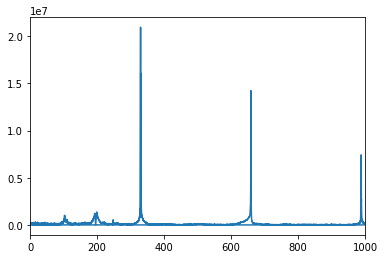

string1 fundamental: 329.5879495554957
note played E1 with 0.04205044450429796 error in hertz and 0.28033629669531973 error in cent


In [231]:
#String1
fs,data = reading(f1)
x,y=fft_transform(data)
signal_plot(x,y)
freq=fundamental(x,y,fs)
find_notes(freq)

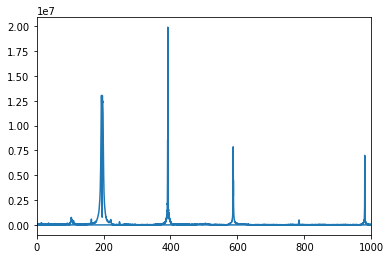

string1 fundamental: 195.75194313765599
note played G3 with 0.24805686234401492 error in hertz and 1.6537124156267662 error in cent


In [234]:
#String2
fs,data = reading(f2)
x,y=fft_transform(data)
signal_plot(x,y)
freq=fundamental(x,y,fs)
find_notes(freq)

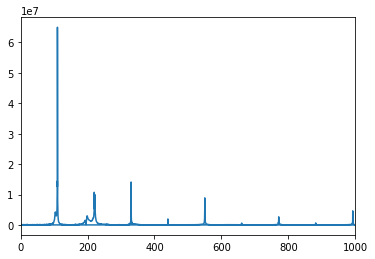

string1 fundamental: 110.04096373860773
note played A5 with 0.04096373860772928 error in hertz and 0.512046732596616 error in cent


In [233]:
#String3
fs,data = reading(f3)
x,y=fft_transform(data)
signal_plot(x,y)
freq=fundamental(x,y,fs)
find_notes(freq)